# WeatherPy

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [18]:
# create lists
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
record_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# set base url
base_url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

for city in cities:
    url = base_url + city
    response = requests.get(url).json()
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if record_counter == 50:
            record_counter = 1
            set_counter +=1
        else:
            record_counter +=1   
        print(f"Processing Record {record_counter} of Set {set_counter}: {city}")
    except KeyError:
        print("City not found. Skipping...")    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1: kodiak
Processing Record 2 of Set 1: ushuaia
Processing Record 3 of Set 1: san juan
Processing Record 4 of Set 1: hengshui
Processing Record 5 of Set 1: bredasdorp
Processing Record 6 of Set 1: dikson
Processing Record 7 of Set 1: ixtapa
Processing Record 8 of Set 1: juneau
Processing Record 9 of Set 1: santa barbara
Processing Record 10 of Set 1: ust-tsilma
Processing Record 11 of Set 1: labrea
Processing Record 12 of Set 1: thompson
Processing Record 13 of Set 1: lazaro cardenas
Processing Record 14 of Set 1: tasiilaq
Processing Record 15 of Set 1: jacareacanga
Processing Record 16 of Set 1: bathsheba
Processing Record 17 of Set 1: beloha
Processing Record 18 of Set 1: norman wells
Processing Record 19 of Set 1: rikitea
Processing Record 20 of Set 1: tuktoyaktuk
Processing Record 21 of Set 1: atuona
Processing Record 22 of Set 1: port alfred
Processing Record 23 of Set 1: busselton
Processing Record 

Processing Record 44 of Set 4: salekhard
Processing Record 45 of Set 4: broken hill
Processing Record 46 of Set 4: carahue
Processing Record 47 of Set 4: maceio
Processing Record 48 of Set 4: qandala
Processing Record 49 of Set 4: anton lizardo
Processing Record 50 of Set 4: rio grande city
Processing Record 1 of Set 5: paamiut
Processing Record 2 of Set 5: carballo
Processing Record 3 of Set 5: presidencia roque saenz pena
Processing Record 4 of Set 5: poum
Processing Record 5 of Set 5: bubaque
Processing Record 6 of Set 5: airai
Processing Record 7 of Set 5: kushiro
Processing Record 8 of Set 5: puerto madero
Processing Record 9 of Set 5: port elizabeth
Processing Record 10 of Set 5: cherskiy
Processing Record 11 of Set 5: alofi
Processing Record 12 of Set 5: pakxan
Processing Record 13 of Set 5: palu
Processing Record 14 of Set 5: namatanai
Processing Record 15 of Set 5: conakry
Processing Record 16 of Set 5: corsicana
Processing Record 17 of Set 5: ugoofaaru
Processing Record 18 of

Processing Record 38 of Set 8: kalininsk
City not found. Skipping...
Processing Record 39 of Set 8: coquimbo
Processing Record 40 of Set 8: ballina
Processing Record 41 of Set 8: severo-kurilsk
Processing Record 42 of Set 8: tocopilla
Processing Record 43 of Set 8: lasa
Processing Record 44 of Set 8: sumbe
Processing Record 45 of Set 8: klyuchi
Processing Record 46 of Set 8: grindavik
Processing Record 47 of Set 8: clyde river
Processing Record 48 of Set 8: manali
Processing Record 49 of Set 8: vilhena
Processing Record 50 of Set 8: longonjo
Processing Record 1 of Set 9: winton
Processing Record 2 of Set 9: luganville
Processing Record 3 of Set 9: carutapera
Processing Record 4 of Set 9: jesup
Processing Record 5 of Set 9: de aar
Processing Record 6 of Set 9: yei
Processing Record 7 of Set 9: la ronge
City not found. Skipping...
Processing Record 8 of Set 9: muyezerskiy
Processing Record 9 of Set 9: kapoeta
Processing Record 10 of Set 9: faya
Processing Record 11 of Set 9: itaituba
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# create new df
cities_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list})

# export new data into a .csv file
cities_df.to_csv("../output_data/cities.csv", index=None, header=True)

# display the new dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Paul Harbor,57.7900,-152.4072,-2.00,64,1,1.54,US,1612159502
1,Ushuaia,-54.8000,-68.3000,10.00,76,75,6.69,AR,1612159429
2,San Juan,-31.5375,-68.5364,14.66,64,60,5.85,AR,1612159502
3,Hengshui,37.7322,115.7011,6.25,43,0,5.21,CN,1612159503
4,Bredasdorp,-34.5322,20.0403,16.67,71,97,1.34,ZA,1612159504


## Inspect data and remove cities where the humidity > 100%.

In [22]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.333224,13.352228,10.057186,74.532743,57.182301,3.729416,1.612160e+09
std,33.329476,90.137926,17.741457,19.564525,38.880072,2.870666,1.055611e+02
min,-54.800000,-175.200000,-45.810000,11.000000,0.000000,0.250000,1.612159e+09
25%,-7.940800,-63.756800,-1.670000,66.000000,20.000000,1.560000,1.612160e+09
50%,25.021300,16.588700,16.000000,78.000000,75.000000,3.060000,1.612160e+09
75%,47.666600,88.166700,24.000000,88.000000,93.000000,5.140000,1.612160e+09
max,78.218600,179.316700,41.000000,100.000000,100.000000,23.000000,1.612160e+09


In [19]:
#  Get the indices of cities that have humidity over 100%.
# for index, row in cities_df.itterows():
#     humid_city = row(["Humidity"] > 99)
    
    
#     print(f"{humid_city} at index {index} has humidity over 100%")
    

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

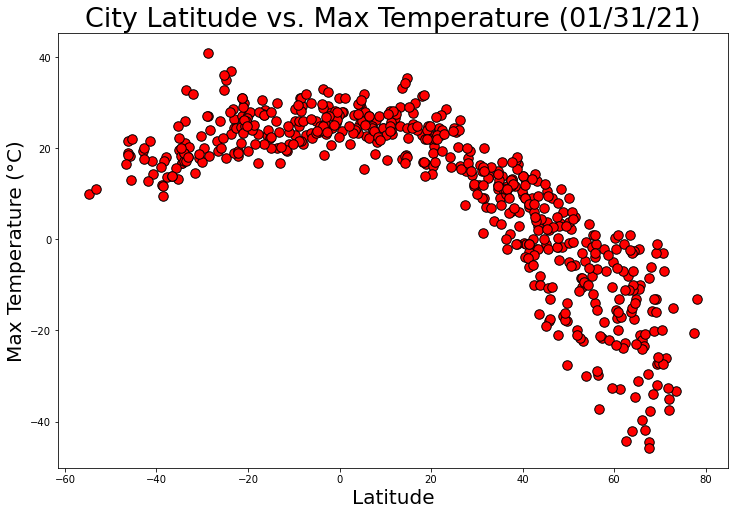

In [106]:
# create a scatter plot to show relationship between lattitude and max temperature
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", s=90, c="r", edgecolor="k")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°C)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

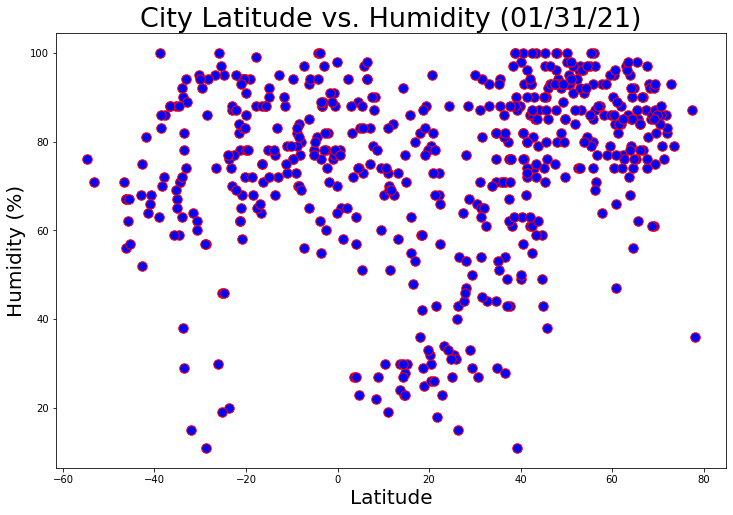

In [120]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", s=90, c="b", edgecolor="r")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

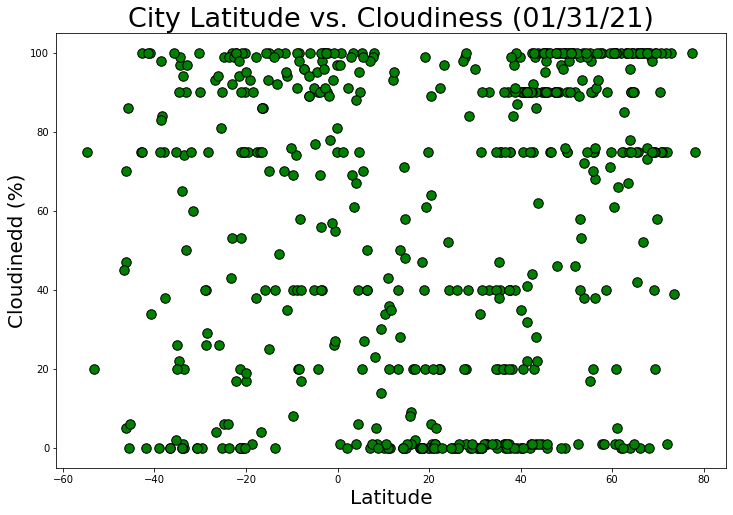

In [122]:
# create a scatter plot to show relationship between lattitude and cloudiness
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", s=90, c="g", edgecolor="k")
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudinedd (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

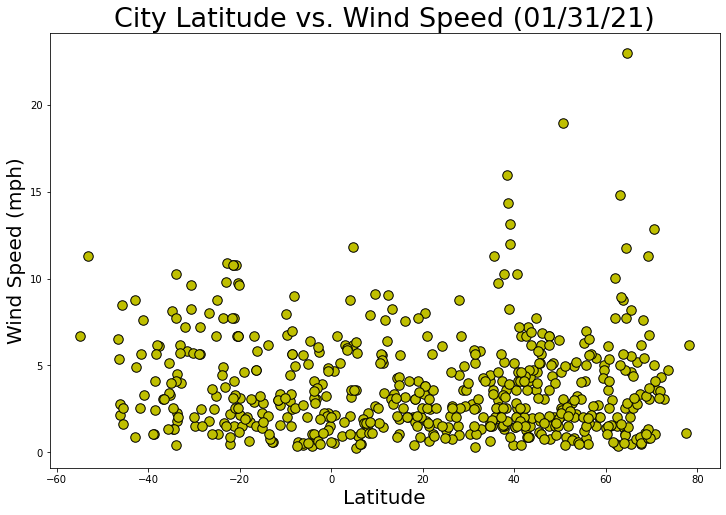

In [118]:
# create a scatter plot to show relationship between lattitude and wind speed
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", s=90, c="y", edgecolor="k")
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig4.png")

plt.show()

## Linear Regression

In [130]:
# create northern and southern hemisphere dataframes
n_hem = cities_df.loc[cities_df["Lat"] >= 0]
s_hem = cities_df.loc[cities_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8754539729551672


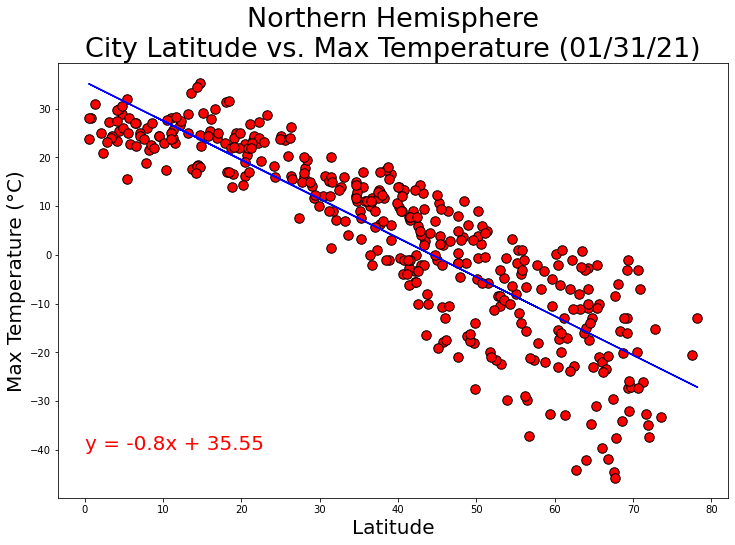

In [156]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "b-")
# print equation in graph
plt.annotate(line_eq, (0,-40), fontsize=20, color="r")

# add labels for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°C)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5383194062760098


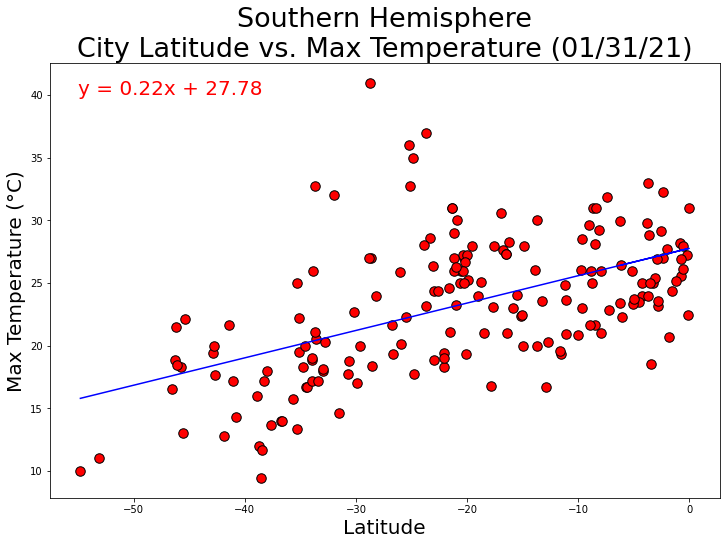

In [157]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "b-")
# print equation in graph
plt.annotate(line_eq, (-55,40), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°C)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.41919146391448586


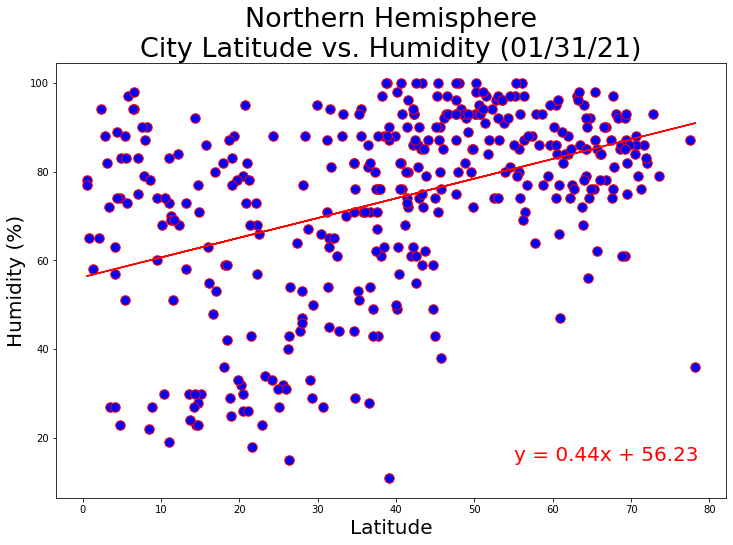

In [146]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (55,15), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.25879152825498675


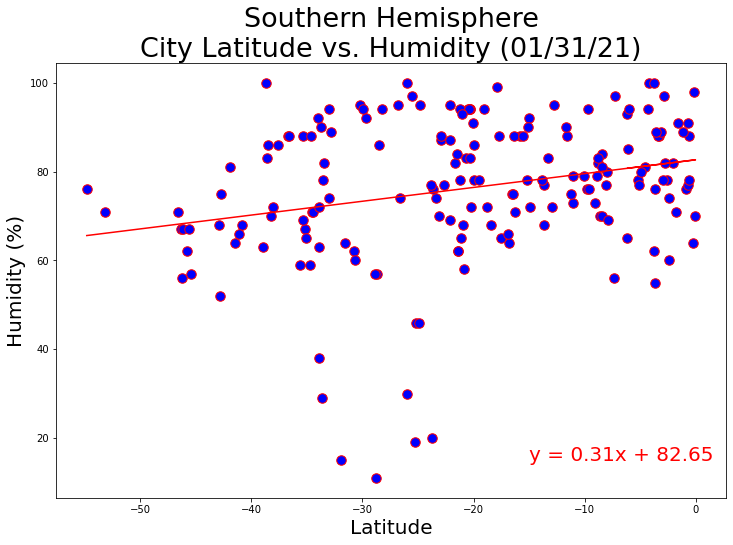

In [148]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (-15,15), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3843045842807665


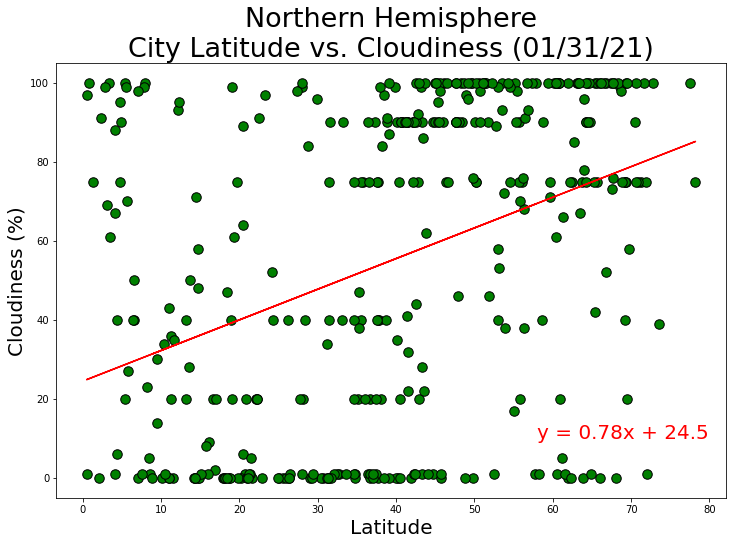

In [153]:
# create a scatter plot to show relationship between lattitude and cloudiness
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (58,10), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2618384026440858


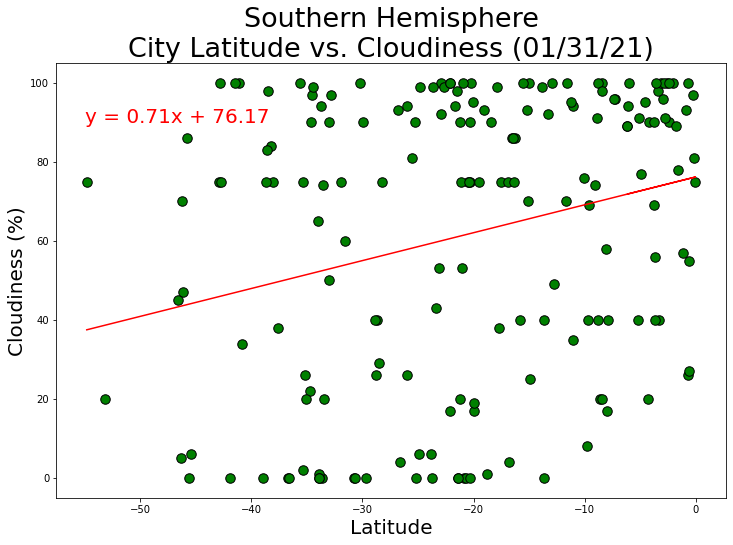

In [155]:
# create a scatter plot to show relationship between lattitude and cloudiness
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (-55,90), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04087344564680256


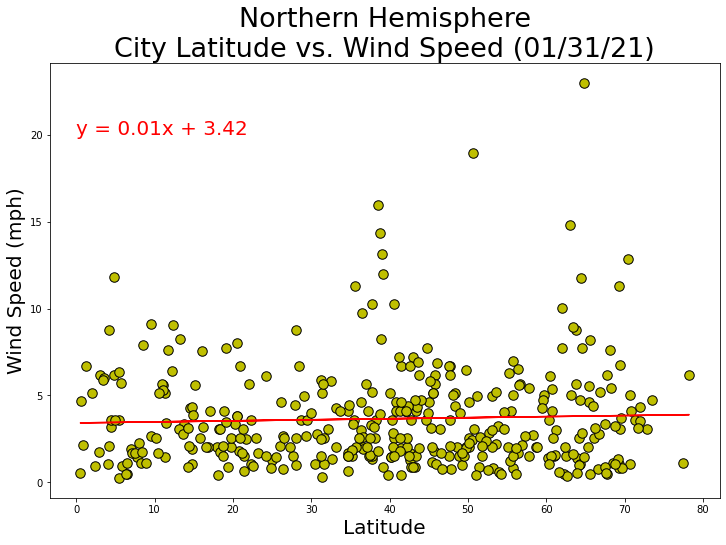

In [159]:
# create a scatter plot to show relationship between lattitude and wind speed in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (0,20), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.26393271905150545


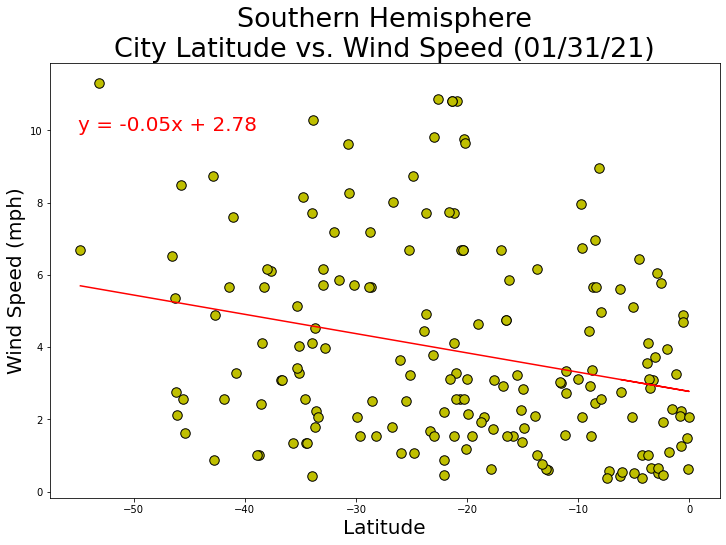

In [161]:
# create a scatter plot to show relationship between lattitude and wind speed in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (-55,10), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()